In [ ]:
#yfinance kütüphanesini indirir
!pip install yfinance

In [ ]:
#missingnoyu indirir
!pip install missingno

In [ ]:
#kütüphane tanımlamaları
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import missingno as msn
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#Dataseti df'e atar
df=pd.read_csv('a2.csv')

In [ ]:
#datasetin baştan 3 satırını gösterir
df.head(3)

,index,Year,Mileage(miles),Engine,PS,Transmission,Fuel,Number_of_Owners,Price(£),href,PPY,MileageRank,PriceRank,PPYRank,Score
0,0,2018,44000,1.6L,114.398422,1,1,1,14995,https://www.autotrader.co.uk/car-details/20221...,2499.166667,215,163,340,718
1,4,2016,42596,1.0L,93.688363,1,0,3,10755,https://www.autotrader.co.uk/car-details/20221...,2688.750000,222,330,276,828
2,7,2015,42700,1.4L,123.274162,1,0,2,10799,https://www.autotrader.co.uk/car-details/20221...,3599.666667,221,327,94,642


In [ ]:
#index, href ve PriceRank sütunlarını kaldırır.
df=df.drop(columns=["index","href","PriceRank"])

In [ ]:
df.head(3)

,Year,Mileage(miles),Engine,PS,Transmission,Fuel,Number_of_Owners,Price(£),PPY,MileageRank,PPYRank,Score
0,2018,44000,1.6L,114.398422,1,1,1,14995,2499.166667,215,340,718
1,2016,42596,1.0L,93.688363,1,0,3,10755,2688.750000,222,276,828
2,2015,42700,1.4L,123.274162,1,0,2,10799,3599.666667,221,94,642


In [ ]:
# Motor hacmindeki L ibaresini kaldırır ve float64 cinsine çevirir
df['Engine']=df['Engine'].str.replace("L","").astype("float64")

In [ ]:
# parametrelerin veri tiplerini gösterir
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              471 non-null    int64  
 1   Mileage(miles)    471 non-null    int64  
 2   Engine            471 non-null    float64
 3   PS                471 non-null    float64
 4   Transmission      471 non-null    int64  
 5   Fuel              471 non-null    int64  
 6   Number_of_Owners  471 non-null    int64  
 7   Price(£)          471 non-null    int64  
 8   PPY               471 non-null    float64
 9   MileageRank       471 non-null    int64  
 10  PPYRank           471 non-null    int64  
 11  Score             471 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 44.3 KB


In [ ]:
df.describe()

,Year,Mileage(miles),Engine,PS,Transmission,Fuel,Number_of_Owners,Price(£),PPY,MileageRank,PPYRank,Score
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,2016.970276,44892.783439,1.301274,116.682559,0.774947,0.191083,1.785563,13935.070064,3048.577682,235.000000,235.000000,705.000000
std,2.208101,27020.236124,0.248567,17.345034,0.418061,0.393572,0.886473,4955.040914,896.647265,136.110249,136.110249,139.228925
min,2014.000000,9.000000,1.000000,84.812623,0.000000,0.000000,1.000000,5000.000000,1682.333333,0.000000,0.000000,299.000000
25%,2015.000000,24902.000000,1.000000,103.550296,1.000000,0.000000,1.000000,10286.500000,2481.666667,117.500000,117.500000,595.000000
50%,2017.000000,40236.000000,1.400000,114.398422,1.000000,0.000000,2.000000,12495.000000,2800.000000,235.000000,235.000000,704.000000
75%,2019.000000,61770.500000,1.500000,123.274162,1.000000,0.000000,2.000000,17495.000000,3342.400000,352.500000,352.500000,809.000000
max,2022.000000,149000.000000,2.000000,197.238659,1.000000,1.000000,7.000000,30450.000000,7375.000000,470.000000,470.000000,1034.000000


In [ ]:
def a1pie(column):
    data=df[column].value_counts()
    plt.figure(figsize=(6,6))
    plt.style.use("ggplot")
    plt.pie(data.values,labels=data.index,autopct="%1.1f%%")
    plt.title(column)
    plt.show()



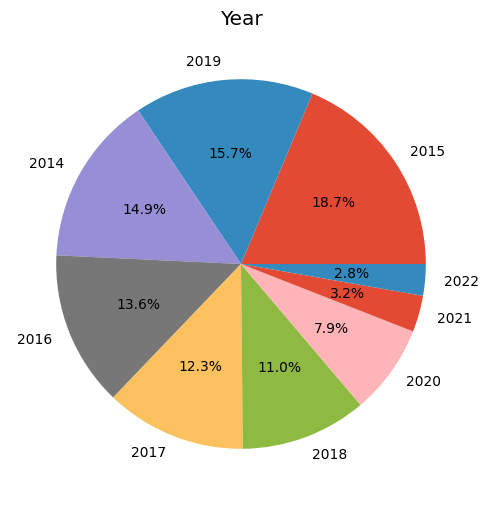

In [ ]:
a1pie("Year")

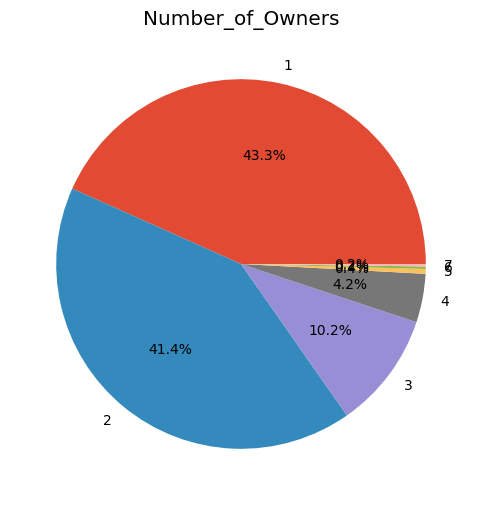

In [ ]:
a1pie("Number_of_Owners")

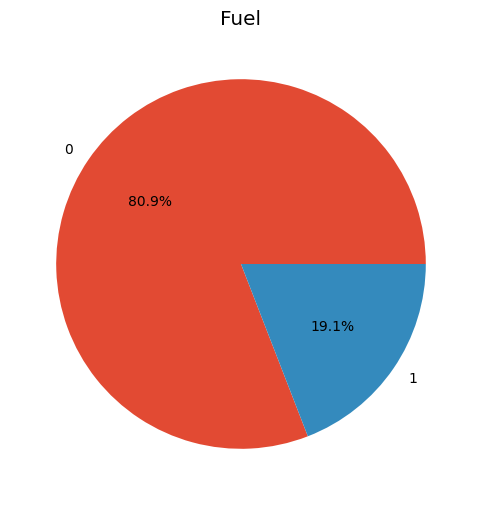

In [ ]:
a1pie("Fuel")

1 = Diesel
0 = Petrol

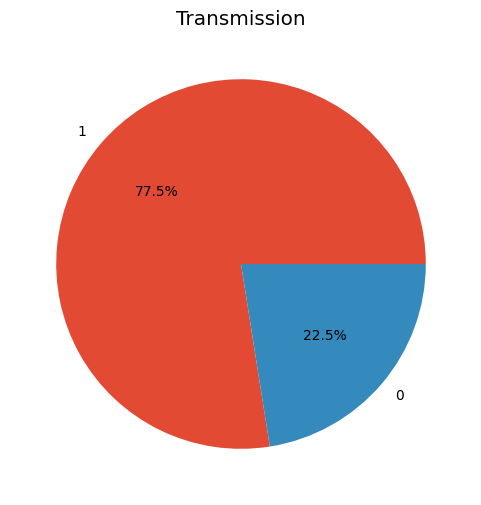

In [ ]:
a1pie("Transmission")

1 = Manual
0 = Automatic

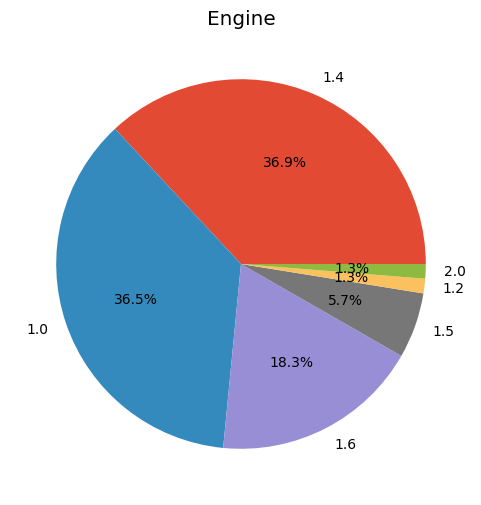

In [ ]:
a1pie("Engine")

In [ ]:
df.head(3)

,Year,Mileage(miles),Engine,PS,Transmission,Fuel,Number_of_Owners,Price(£),PPY,MileageRank,PPYRank,Score
0,2018,44000,1.6,114.398422,1,1,1,14995,2499.166667,215,340,718
1,2016,42596,1.0,93.688363,1,0,3,10755,2688.750000,222,276,828
2,2015,42700,1.4,123.274162,1,0,2,10799,3599.666667,221,94,642


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              471 non-null    int64  
 1   Mileage(miles)    471 non-null    int64  
 2   Engine            471 non-null    float64
 3   PS                471 non-null    float64
 4   Transmission      471 non-null    int64  
 5   Fuel              471 non-null    int64  
 6   Number_of_Owners  471 non-null    int64  
 7   Price(£)          471 non-null    int64  
 8   PPY               471 non-null    float64
 9   MileageRank       471 non-null    int64  
 10  PPYRank           471 non-null    int64  
 11  Score             471 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 44.3 KB


In [ ]:
#Bağımlı değişken olarak "Price(£)" sütununu seçer.
y=dfdum[['Price(£)']]

#Bağımsız değişkenlere Price sütunu hariç tüm parametreleri atar
x=dfdum.drop("Price(£)",axis=1)

In [ ]:
# Veri setini eğitim ve test setlerine ayırır
# x: Bağımsız değişkenlerin (özelliklerin) bulunduğu veri seti
# y: Bağımlı değişkenin (hedef değişkenin) bulunduğu veri seti
# train_size=0.70: Veri setinin %70'i eğitim için ayrılacak
# random_state=12: Rastgele bölünme sırasında kullanılacak rastgele durumun belirlenmesi için başlangıç sayısı
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70, random_state=12)

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=12)

In [ ]:
# Eğitim ve test setlerinin boyutlarını ekrana yazdırır. (veri sayısı , veri çeşidi) şeklinde

print("X Train: ",x_train.shape)
print("X Test: ",x_test.shape)
print("Y Train: ",y_train.shape)
print("Y Test: ",y_test.shape)

X Train:  (329, 11)
X Test:  (142, 11)
Y Train:  (329, 1)
Y Test:  (142, 1)


In [ ]:
df.head (3)

,Year,Mileage(miles),Engine,PS,Transmission,Fuel,Number_of_Owners,Price(£),PPY,MileageRank,PPYRank,Score
0,2018,44000,1.6,114.398422,1,1,1,14995,2499.166667,215,340,718
1,2016,42596,1.0,93.688363,1,0,3,10755,2688.750000,222,276,828
2,2015,42700,1.4,123.274162,1,0,2,10799,3599.666667,221,94,642


In [ ]:
dfdum.columns

Index(['Year', 'Mileage(miles)', 'Engine', 'PS', 'Number_of_Owners',
       'Price(£)', 'PPY', 'MileageRank', 'PPYRank', 'Score', 'Transmission_1',
       'Fuel_1'],
      dtype='object')

In [ ]:
#girilen parametrelerdeki bi aracın tahmini fiyatı 12.989 Sterlin
model.predict([[2017,50000,1.6,120,1,2500,220,300,800,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[12989.06201782]])

In [ ]:
#değişken katsayıkarı
model.coef_

array([[ 2.31297926e+03,  1.95575991e-02, -2.56959167e+02,
         1.13624301e+01, -2.27789223e+01,  6.29859489e-01,
         9.60878617e+00, -7.83873432e+00, -5.13526577e+00,
        -3.34450092e+02,  1.45832720e+02]])

In [ ]:
#sabit sayı
model.intercept_

array([-4651572.14935131])